In [1]:
import pandas as pd
import numpy as np

In [2]:
#import file from C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn
data = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/train.csv", index_col=0)

In [3]:
# data['Age_Tenure_Ratio'] = data['Age']/data['Tenure']
# data['Balance_Salary_Ratio'] = data['Balance']/data['EstimatedSalary']
# data['Age_Balance_Ratio'] = data['Age']/data['Balance']
# data['Balance_Tenure_Ratio'] = data['Balance']/data['Tenure']
# data['CreditScore_Tenure_Ratio'] = data['CreditScore']/data['Tenure']
# data['OtherProducts'] = data['NumOfProducts'] - data['HasCrCard']
# data['Age_Balance_Salary_Ratio'] = data['Age']/data['Balance']/data['EstimatedSalary']
# data['Age_CreditScore_Ratio'] = data['Age']/data['CreditScore']
# data['Balance_CreditScore_Ratio'] = data['Balance']/data['CreditScore']
# data['Balance_Tenure_Salary_Ratio'] = data['Balance']/data['Tenure']/data['EstimatedSalary']
# data['CreditScore_Tenure_Salary_Ratio'] = data['CreditScore']/data['Tenure']/data['EstimatedSalary']
# data = data.replace([np.inf, -np.inf], 0)
# data = data.fillna(0)

In [68]:
%run Source_Be_With_Me.ipynb
eda(data)

NameError: name 'data' is not defined

In [5]:
data.drop(['Surname','CustomerId'], axis=1, inplace=True)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['Age'] = data['Age'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Geography','Gender']))

In [7]:
# Transforming
transformed = transformer.fit_transform(data.drop(['Exited'], axis=1))
print(transformed.dtype)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = data.index
# Joining tables
data = pd.concat([data, transformed_df], axis=1)
# Dropping old categorical columns
data.drop(['Geography','Gender'], axis=1, inplace=True)
# CHecking result
data.head()

float64


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,,
0,668,33,3,0.00,2,1,0,181449.97,0,1.0,0.0,0.0,0.0,1.0
1,627,33,1,0.00,2,1,1,49503.50,0,1.0,0.0,0.0,0.0,1.0
2,678,40,10,0.00,2,1,0,184866.69,0,1.0,0.0,0.0,0.0,1.0
3,581,34,2,148882.54,1,1,1,84560.88,0,1.0,0.0,0.0,0.0,1.0
4,716,33,5,0.00,2,1,1,15068.83,0,0.0,0.0,1.0,0.0,1.0


In [8]:
trainX, trainY, testX, testY = stratified_sampling(data, 'Exited', 0.9, 903949505)

Original distribution


,counts,%
0,130113,78.84
1,34921,21.16




Train distribution


,counts,%
0,13011,78.84
1,3492,21.16




Test distribution


,counts,%
0,117102,78.84
1,31429,21.16




Train_x shape
Number of columns are 16503 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
3638,669,32,7,0.00,2,1,0,93982.02,1.0,0.0,0.0,0.0,1.0
159233,672,29,9,0.00,2,1,1,134794.02,1.0,0.0,0.0,1.0,0.0
38435,644,32,2,0.00,2,1,0,103932.38,1.0,0.0,0.0,0.0,1.0
144063,724,24,7,142755.25,1,0,0,34231.48,0.0,1.0,0.0,0.0,1.0
52235,572,39,8,89047.74,1,1,1,178373.87,1.0,0.0,0.0,0.0,1.0




Train_y shape
Number of columns are 16503 and number of rows are 1


,Exited
id,
3638,0
159233,0
38435,0
144063,0
52235,0




Train_x shape
Number of columns are 148531 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
65509,632,31,7,111388.18,1,0,1,173498.45,0.0,1.0,0.0,1.0,0.0
20875,641,34,8,0.00,2,0,0,124615.59,1.0,0.0,0.0,0.0,1.0
53648,726,63,6,123948.85,1,0,0,145560.38,1.0,0.0,0.0,1.0,0.0
40310,671,29,3,105229.53,1,1,1,131804.86,0.0,0.0,1.0,0.0,1.0
60496,711,40,7,0.00,2,1,0,180829.87,0.0,0.0,1.0,0.0,1.0




Train_y shape
Number of columns are 148531 and number of rows are 1


,Exited
id,
65509,0
20875,0
53648,1
40310,0
60496,0


In [9]:
# join testX and testY on index to create a daframe data
data = pd.concat([testX, testY], axis=1)
testX, testY, ignoreX, ignoreY = stratified_sampling(data, 'Exited', 0.5, 903949505)
#delete pandas dataframe ignoreX, ignoreY
del ignoreX
del ignoreY
del data

Original distribution


,counts,%
0,117102,78.84
1,31429,21.16




Train distribution


,counts,%
0,58551,78.84
1,15714,21.16




Test distribution


,counts,%
0,58551,78.84
1,15715,21.16




Train_x shape
Number of columns are 74265 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
121133,675,29,6,121063.57,2,0,1,102076.92,0.0,1.0,0.0,0.0,1.0
39290,569,33,3,153058.10,1,1,1,102625.08,0.0,1.0,0.0,1.0,0.0
156352,629,32,7,137781.65,1,0,1,153921.32,1.0,0.0,0.0,1.0,0.0
77927,721,31,3,0.00,2,1,0,121151.10,1.0,0.0,0.0,1.0,0.0
93794,642,33,2,0.00,2,1,0,131736.23,1.0,0.0,0.0,1.0,0.0




Train_y shape
Number of columns are 74265 and number of rows are 1


,Exited
id,
121133,0
39290,1
156352,0
77927,0
93794,0




Train_x shape
Number of columns are 74266 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
136760,706,37,9,0.00,1,0,1,159919.15,1.0,0.0,0.0,1.0,0.0
24160,745,36,2,114370.43,1,1,0,76582.95,0.0,1.0,0.0,0.0,1.0
52087,815,35,4,137455.99,1,1,1,184178.29,0.0,1.0,0.0,0.0,1.0
97925,802,29,6,0.00,2,0,0,166957.82,1.0,0.0,0.0,0.0,1.0
17721,646,41,4,126273.95,1,1,1,70400.86,0.0,1.0,0.0,1.0,0.0




Train_y shape
Number of columns are 74266 and number of rows are 1


,Exited
id,
136760,1
24160,1
52087,1
97925,0
17721,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX = pd.DataFrame(scaler.transform(trainX), columns=trainX.columns, index=trainX.index)
testX = pd.DataFrame(scaler.transform(testX), columns=testX.columns, index=testX.index)
display(trainX.head())
display(testX.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
3638,0.61,0.22,0.7,0.00,0.33,1.0,0.0,0.47,1.0,0.0,0.0,0.0,1.0
159233,0.62,0.17,0.9,0.00,0.33,1.0,1.0,0.67,1.0,0.0,0.0,1.0,0.0
38435,0.56,0.22,0.2,0.00,0.33,1.0,0.0,0.52,1.0,0.0,0.0,0.0,1.0
144063,0.73,0.10,0.7,0.60,0.00,0.0,0.0,0.17,0.0,1.0,0.0,0.0,1.0
52235,0.41,0.33,0.8,0.37,0.00,1.0,1.0,0.89,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
121133,0.63,0.17,0.6,0.51,0.33,0.0,1.0,0.51,0.0,1.0,0.0,0.0,1.0
39290,0.40,0.24,0.3,0.64,0.00,1.0,1.0,0.51,0.0,1.0,0.0,1.0,0.0
156352,0.53,0.22,0.7,0.58,0.00,0.0,1.0,0.77,1.0,0.0,0.0,1.0,0.0
77927,0.72,0.21,0.3,0.00,0.33,1.0,0.0,0.61,1.0,0.0,0.0,1.0,0.0
93794,0.56,0.24,0.2,0.00,0.33,1.0,0.0,0.66,1.0,0.0,0.0,1.0,0.0


In [11]:
# Dtree = decision_tree(X=trainX, Y=trainY, max_depth=9)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(Dtree, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(Dtree, testX, testY)

In [12]:
# XGB = xgboost(X=trainX, Y=trainY, learning_rate=0.05, n_estimators=1000, subsample=0.3, max_depth=5)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(XGB, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(XGB, testX, testY)

In [13]:
# KNN = knn(X=trainX, Y=trainY, distance='euclidean', n_neighbors=1000)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(KNN, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(KNN, testX, testY)

In [14]:
# NN = nnet(X=trainX, Y=trainY, learning_rate=0.001, loss='binary_crossentropy', epochs=100, batch_size=32, validation_split=0.2, patience=15)

In [15]:
# GBM = gradient_boosting(X=trainX, Y=trainY, learning_rate=0.01, n_estimators=10000, subsample=0.5, max_depth=6)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(GBM, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(GBM, testX, testY)

In [16]:
# #Testing on OOT dataset
# #read data C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\Test.csv
# submission = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Test.csv", index_col=0)
# # submission['Age_Tenure_Ratio'] = submission['Age']/submission['Tenure']
# # submission['Balance_Salary_Ratio'] = submission['Balance']/submission['EstimatedSalary']
# # submission['Age_Balance_Ratio'] = submission['Age']/submission['Balance']
# # submission['Balance_Tenure_Ratio'] = submission['Balance']/submission['Tenure']
# # submission['CreditScore_Tenure_Ratio'] = submission['CreditScore']/submission['Tenure']
# # submission['OtherProducts'] = submission['NumOfProducts'] - submission['HasCrCard']
# # submission['Age_Balance_Salary_Ratio'] = submission['Age']/submission['Balance']/submission['EstimatedSalary']
# # submission['Age_CreditScore_Ratio'] = submission['Age']/submission['CreditScore']
# # submission['Balance_CreditScore_Ratio'] = submission['Balance']/submission['CreditScore']
# # submission['Balance_Tenure_Salary_Ratio'] = submission['Balance']/submission['Tenure']/submission['EstimatedSalary']
# # submission['CreditScore_Tenure_Salary_Ratio'] = submission['CreditScore']/submission['Tenure']/submission['EstimatedSalary']
# submission = submission.replace([np.inf, -np.inf], 0)
# submission = submission.fillna(0)
# submission.drop(['Surname','CustomerId'], axis=1, inplace=True)
# submission['HasCrCard'] = submission['HasCrCard'].astype(int)
# submission['Age'] = submission['Age'].astype(int)
# submission['IsActiveMember'] = submission['IsActiveMember'].astype(int)
# # Transforming
# transformed = transformer.transform(submission)
# # Transformating back
# transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# # One-hot encoding removed an index. Let's put it back:
# transformed_df.index = submission.index
# # Joining tables
# submission = pd.concat([submission, transformed_df], axis=1)
# # Dropping old categorical columns
# submission.drop(['Geography','Gender'], axis=1, inplace=True)
# # CHecking result
# eda(submission)
# submission = pd.DataFrame(scaler.transform(submission), columns=submission.columns, index=submission.index)

# # #Use Dtree
# # predictions_submission = Dtree.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_Dtree.csv", index=True)

# # #Use XGB
# # predictions_submission = XGB.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_XGB.csv", index=True)

# # #Use Knn
# # predictions_submission = KNN.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_KNN.csv", index=True)

# #Use NN
# predictions_submission = NN.predict(submission)
# threshold = 0.8
# predictions_submission = (predictions_submission > threshold).astype(int)
# predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# #change column names to submi
# predictions_submission.columns = ['Exited']
# display(predictions_submission.head())
# #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_NN8.csv", index=True)

# # #Use GBM
# # predictions_submission = GBM.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_GBM.csv", index=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


<Figure size 1080x720 with 0 Axes>

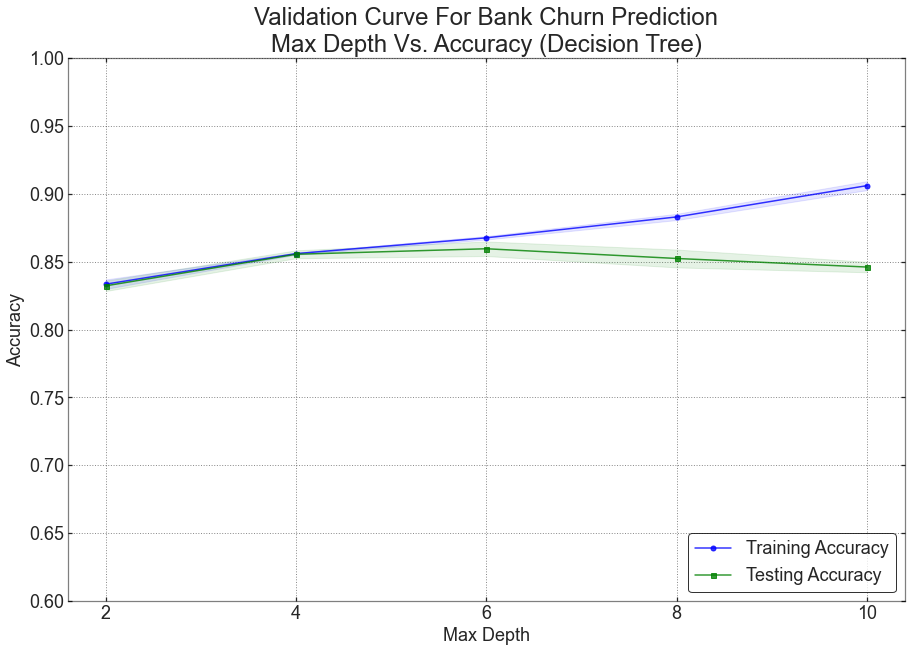

<Figure size 576x432 with 0 Axes>

Fitting 5 folds for each of 2 candidates, totalling 10 fits


<Figure size 1080x720 with 0 Axes>

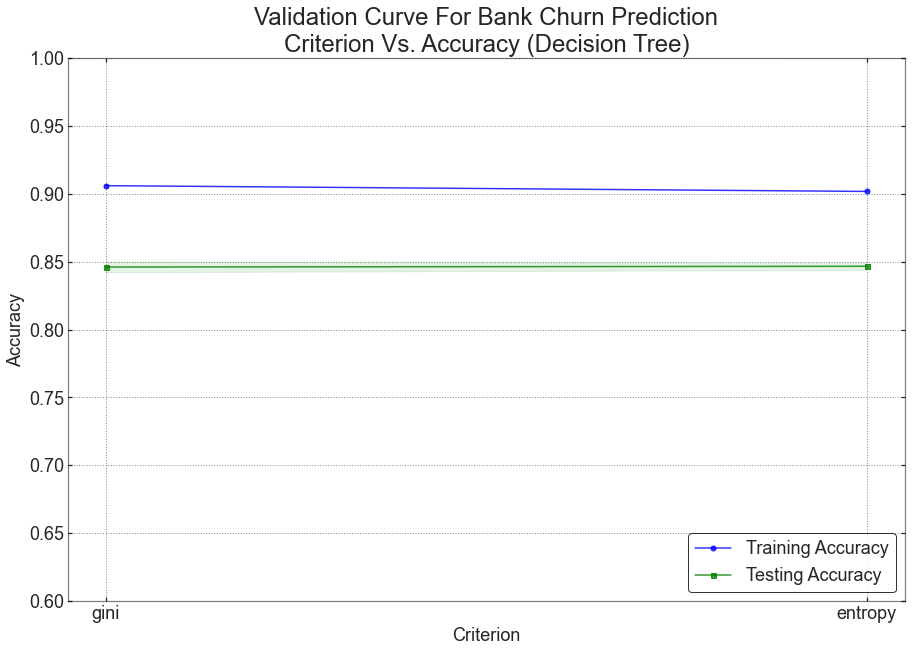

<Figure size 576x432 with 0 Axes>

In [19]:
# Define the hyperparameter grid for max_depth
classifier = DecisionTreeClassifier(random_state=903949505)
param_grid = {
    'max_depth': np.array([2,4,6,8,10])
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_max_depth', col2='Max Depth', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MaxDepth.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MaxDepth.jpg",title = "Validation Curve For Bank Churn Prediction\nMax Depth Vs. Accuracy (Decision Tree)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2,4,6,8,10], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

param_grid = {
    'criterion' : ['gini', 'entropy']
}
classifier = DecisionTreeClassifier(random_state=903949505, max_depth=10)

DT_Grid_Min_Sample_Split = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_criterion', col2='Criterion', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_criterion.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_criterion.jpg",title = "Validation Curve For Bank Churn Prediction\nCriterion Vs. Accuracy (Decision Tree)",form='{:.0f}',
                                Change_name= True, custom_x_values=['gini', 'entropy'], new_labels = ['gini', 'entropy'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 1080x720 with 0 Axes>

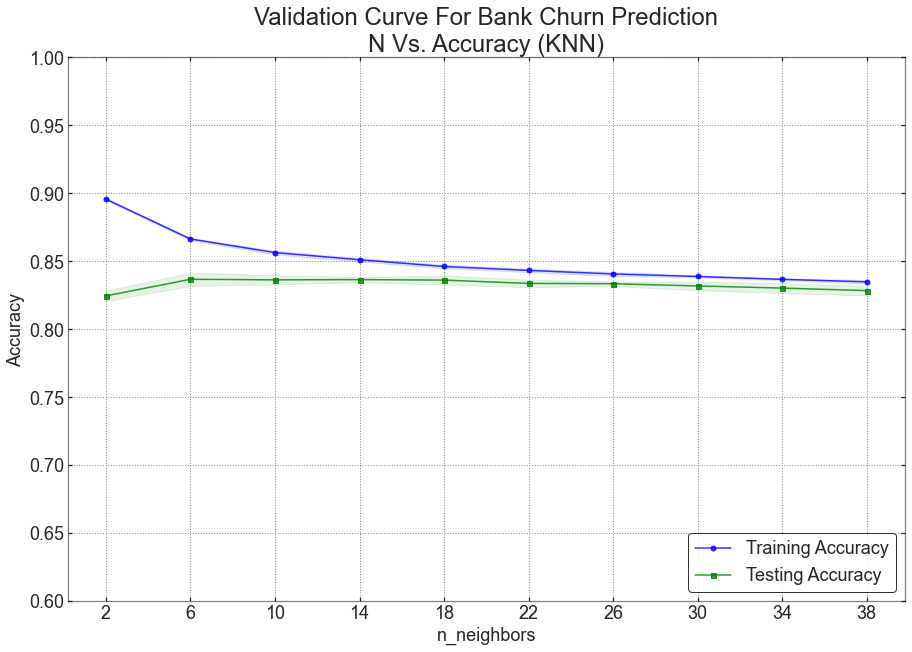

<Figure size 576x432 with 0 Axes>

In [44]:
# Define the hyperparameter grid for max_depth
classifier = KNeighborsClassifier(n_neighbors=10)

param_grid = {
    'n_neighbors': [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_n_neighbors', col2='n_neighbors', classifier=classifier,
                                excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_N.xlsx",
                                printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_N.jpg",title = "Validation Curve For Bank Churn Prediction\nN Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2, 6, 10, 14, 18, 22, 26, 30, 34, 38], new_labels = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 1080x720 with 0 Axes>

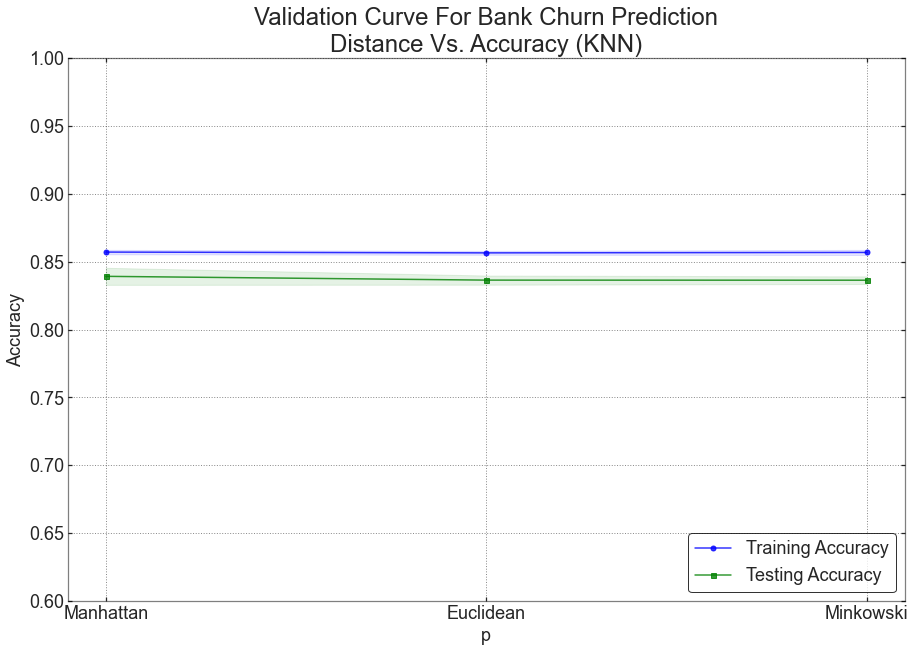

<Figure size 576x432 with 0 Axes>

In [46]:
classifier = KNeighborsClassifier(n_neighbors=10)
param_grid = {
    'p': [1, 2, 3]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_p', col2='p', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_distance.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_distance.jpg",title = "Validation Curve For Bank Churn Prediction\nDistance Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= True, custom_x_values=[1, 2, 3], new_labels = ['Manhattan','Euclidean','Minkowski'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 1080x720 with 0 Axes>

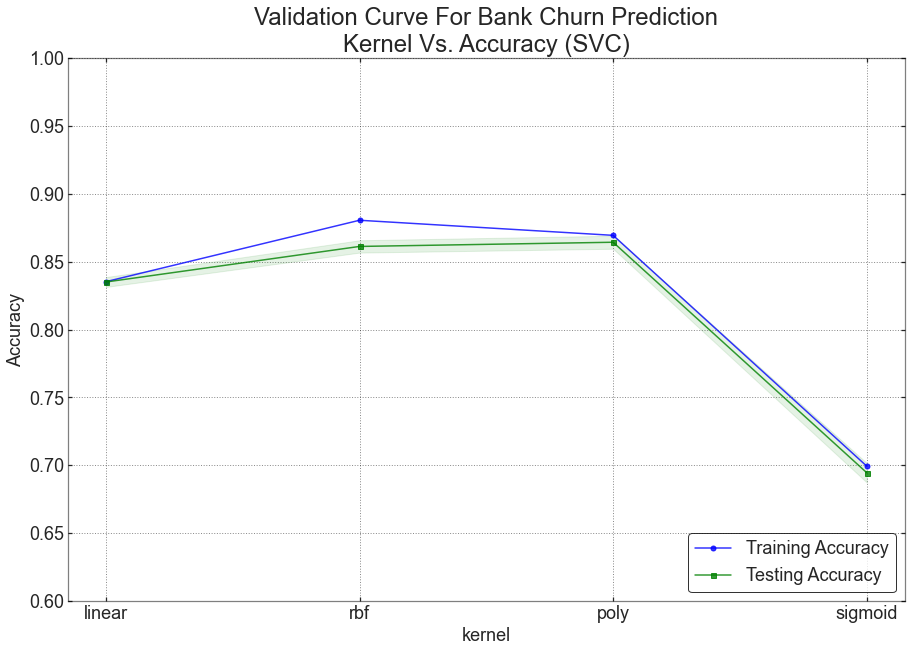

<Figure size 576x432 with 0 Axes>

In [45]:
from sklearn.svm import SVC
classifier = SVC(C=100)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Different kernel types
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_kernel', col2='kernel', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_kernel.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_kernel.jpg",title = "Validation Curve For Bank Churn Prediction\nKernel Vs. Accuracy (SVC)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 1080x720 with 0 Axes>

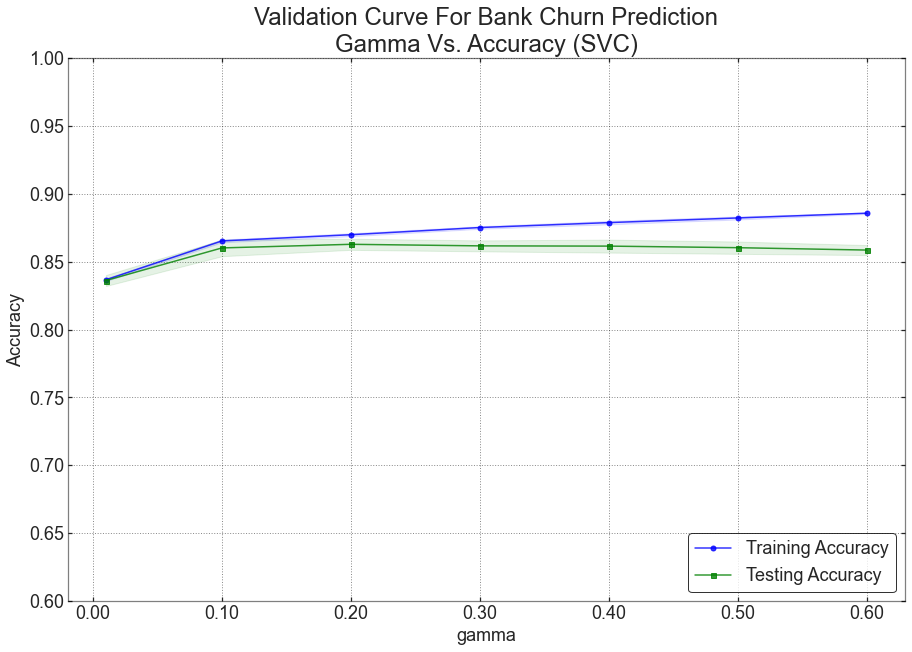

<Figure size 576x432 with 0 Axes>

In [46]:
classifier = SVC(kernel='rbf', C = 100)
param_grid = {
    #'C': [0.1, 1, 10, 100]  # Different values for the regularization parameter C
    'gamma': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_gamma', col2='gamma', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_gamma.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_gamma.jpg",title = "Validation Curve For Bank Churn Prediction\nGamma Vs. Accuracy (SVC)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1080x720 with 0 Axes>

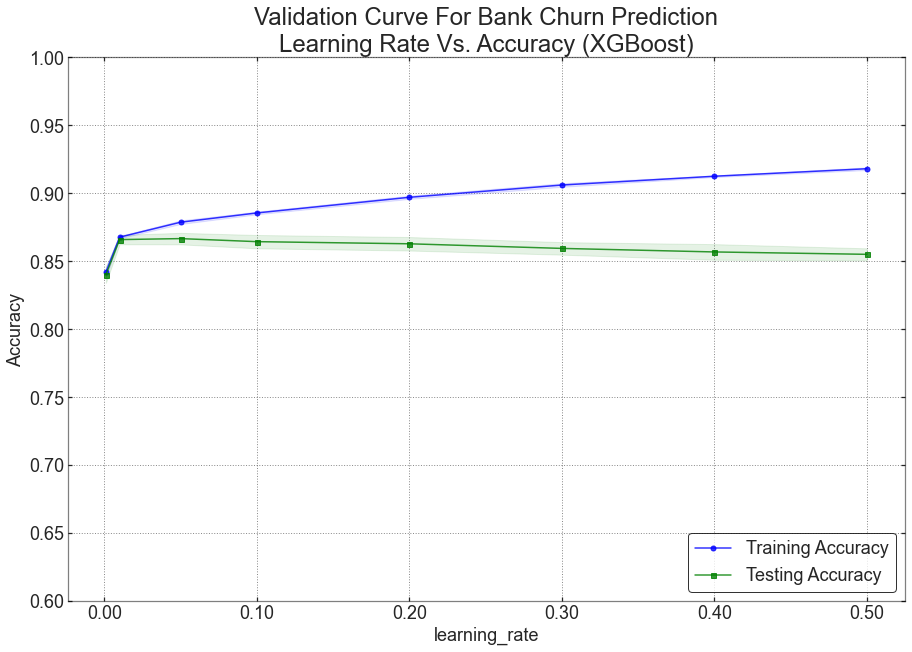

<Figure size 576x432 with 0 Axes>

In [26]:
classifier = xgb.XGBClassifier(n_estimators=1000, nthread=-1, early_stopping_rounds = 50, max_depth=2)
param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_learning_rate', col2='learning_rate', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.jpg",title = "Validation Curve For Bank Churn Prediction\nLearning Rate Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1080x720 with 0 Axes>

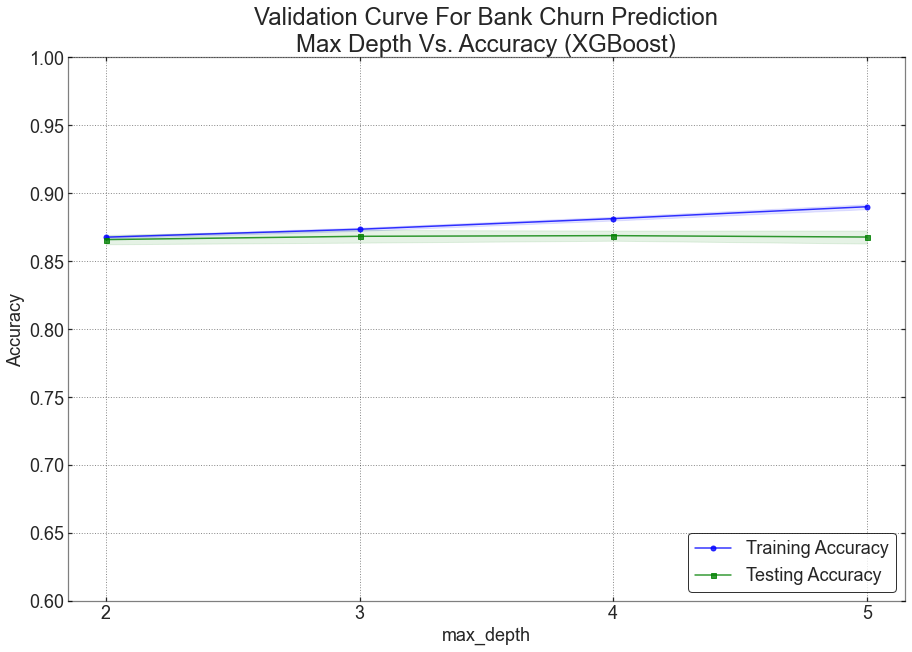

<Figure size 576x432 with 0 Axes>

In [27]:
classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50)
param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_max_depth', col2='max_depth', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_max_depth.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_max_depth.jpg",title = "Validation Curve For Bank Churn Prediction\nMax Depth Vs. Accuracy (XGBoost)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2, 3, 4, 5], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1080x720 with 0 Axes>

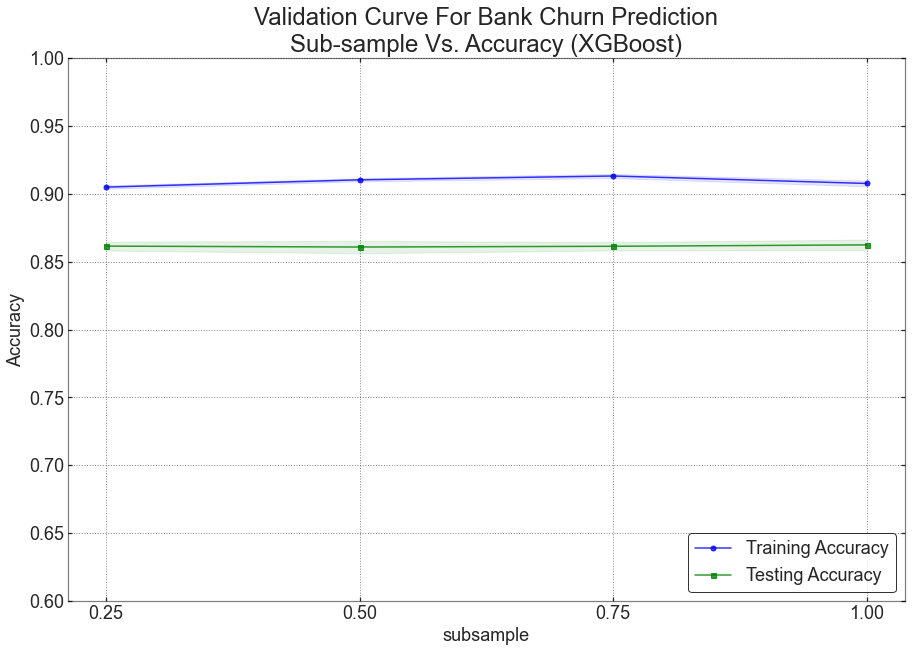

<Figure size 576x432 with 0 Axes>

In [28]:
classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3)
param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
    'subsample': [0.25, 0.5, 0.75, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_subsample', col2='subsample', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_subsample.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_subsample.jpg",title = "Validation Curve For Bank Churn Prediction\nSub-sample Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.25, 0.5, 0.75, 1.0], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


<Figure size 1080x720 with 0 Axes>

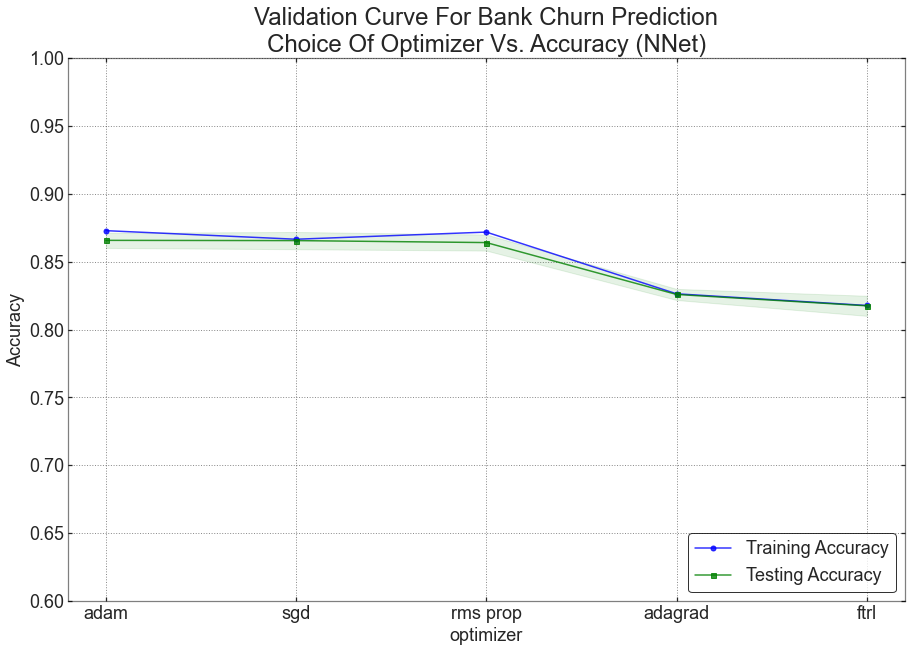

<Figure size 576x432 with 0 Axes>

In [13]:
# Define a function to create your TensorFlow model
def create_model(optimizer='adam', hidden_units=32, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=trainX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=128, verbose=0)

param_grid = {
    'optimizer': ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Ftrl'],
#     'hidden_units': [8, 16, 32],
#     'activation': ['relu', 'tanh']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_optimizer', col2='optimizer', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_optimizer.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_optimizer.jpg",title = "Validation Curve For Bank Churn Prediction\nChoice Of Optimizer Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['adam', 'sgd', 'RMSprop', 'Adagrad', 'Ftrl'], new_labels = ['adam', 'sgd', 'rms prop', 'adagrad', 'ftrl'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 1080x720 with 0 Axes>

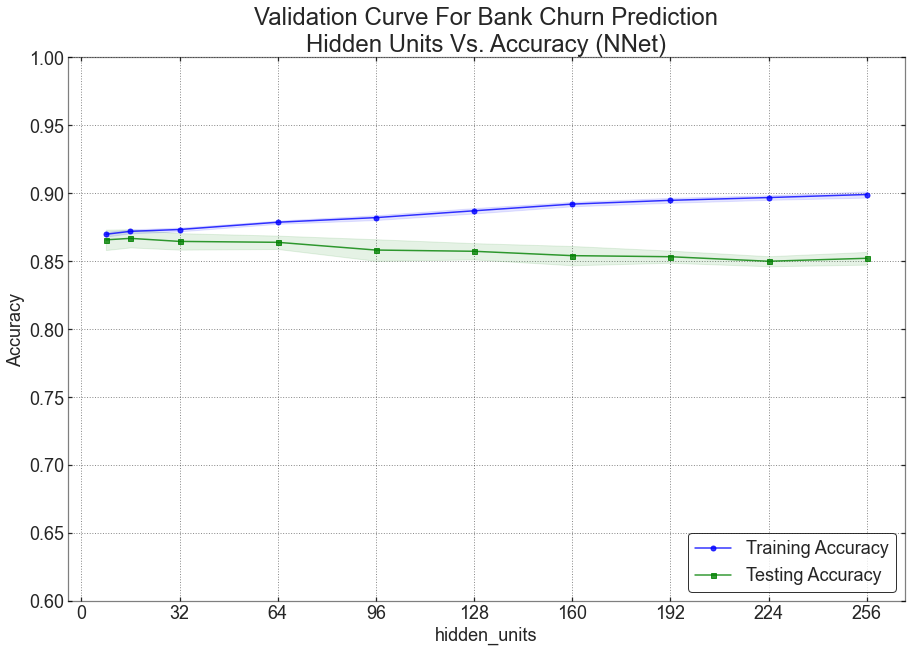

<Figure size 576x432 with 0 Axes>

In [12]:
# Define a function to create your TensorFlow model
def create_model(optimizer='adam', hidden_units=4, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=trainX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=128, verbose=0)

param_grid = {
#     'optimizer': ['adam', 'sgd'],
    'hidden_units': [8, 16, 32, 64, 96, 128, 160, 192, 224, 256],
#     'activation': ['relu', 'tanh']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_hidden_units', col2='hidden_units', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_HiddenUnits.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_HiddenUnits.jpg",title = "Validation Curve For Bank Churn Prediction\nHidden Units Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[0, 32, 64, 96, 128, 160, 192, 224, 256], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


<Figure size 1080x720 with 0 Axes>

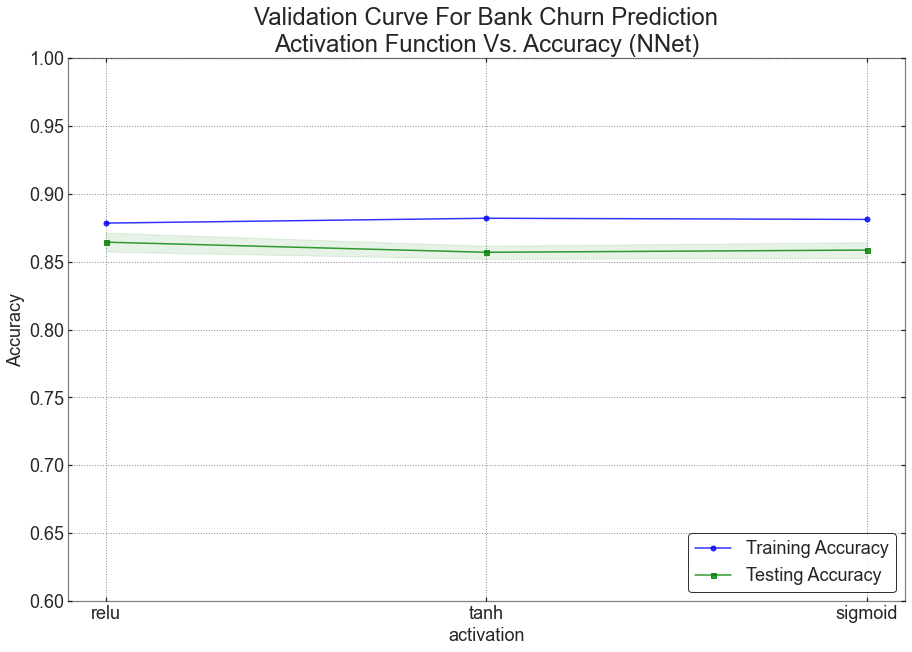

<Figure size 576x432 with 0 Axes>

In [19]:
# Define a function to create your TensorFlow model
def create_model(activation, optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

param_grid = {
#     'optimizer': ['adam', 'sgd'],
#    'hidden_units': [4, 8, 16, 20, 24, 28, 32],
     'activation': ['relu', 'tanh', 'sigmoid']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_activation', col2='activation', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_ActivationFunc.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/NN_ValidationCurve_ActivationFunc.jpg",title = "Validation Curve For Bank Churn Prediction\nActivation Function Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['relu', 'tanh', 'sigmoid'], new_labels = ['relu', 'tanh', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)


[learning_curve] Training set sizes: [ 1320  2640  3960  5280  6601  7921  9241 10561 11881]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


<Figure size 1080x720 with 0 Axes>

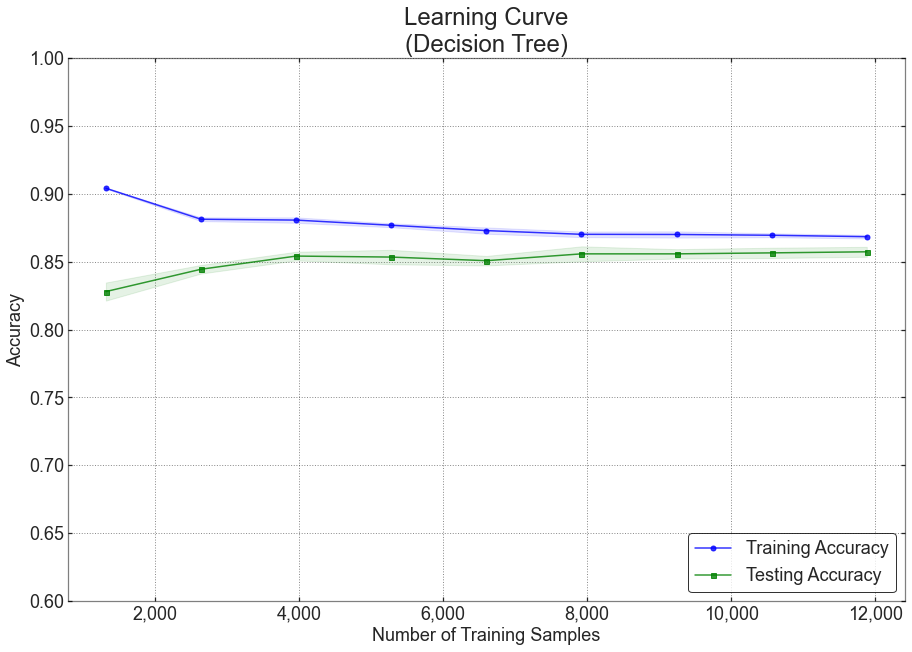

<Figure size 576x432 with 0 Axes>

In [30]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/LearningCurve_DecisionTree.jpg"
                        , X_train=trainX, y_train=trainY, classifier=DTree, title = "Learning Curve\n(Decision Tree)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

[learning_curve] Training set sizes: [ 1320  2640  3960  5280  6601  7921  9241 10561 11881]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed:    1.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    2.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.0s finished


<Figure size 1080x720 with 0 Axes>

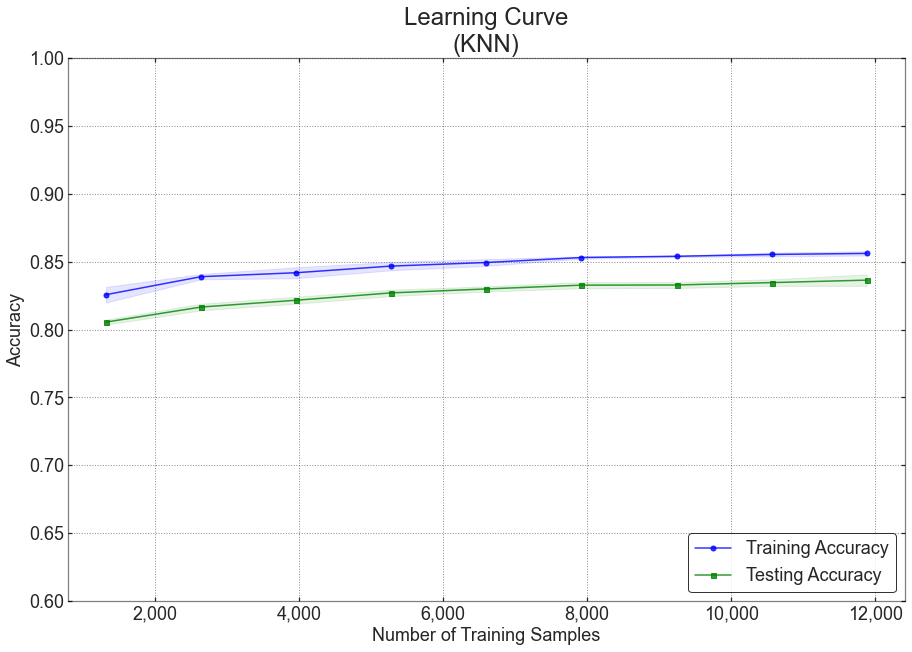

<Figure size 576x432 with 0 Axes>

In [29]:
KNN = KNeighborsClassifier(n_neighbors=10, p=2)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/LearningCurve_KNN.jpg"
                        , X_train=trainX, y_train=trainY, classifier=KNN, title = "Learning Curve\n(KNN)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

[learning_curve] Training set sizes: [ 1320  2640  3960  5280  6601  7921  9241 10561 11881]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed:    5.4s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:   12.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   20.2s finished


<Figure size 1080x720 with 0 Axes>

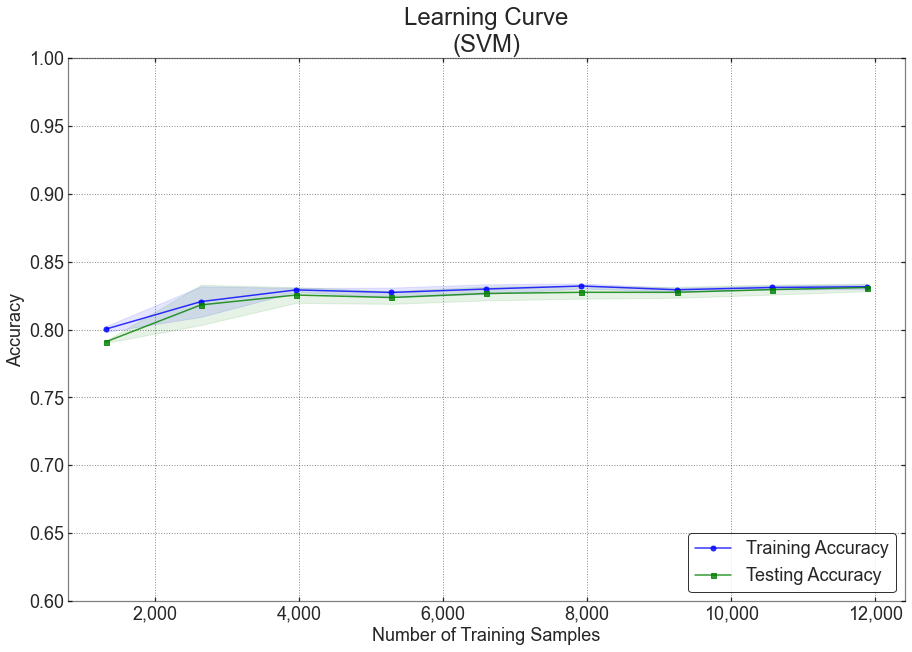

<Figure size 576x432 with 0 Axes>

In [51]:
SVM = SVC(kernel='rbf', C = 10, gamma = 0.02, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/LearningCurve_SVC.jpg"
                        , X_train=trainX, y_train=trainY, classifier=SVM, title = "Learning Curve\n(SVM)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

[learning_curve] Training set sizes: [ 1320  2640  3960  5280  6601  7921  9241 10561 11881]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed:    8.8s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:   16.8s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   24.1s finished


<Figure size 1080x720 with 0 Axes>

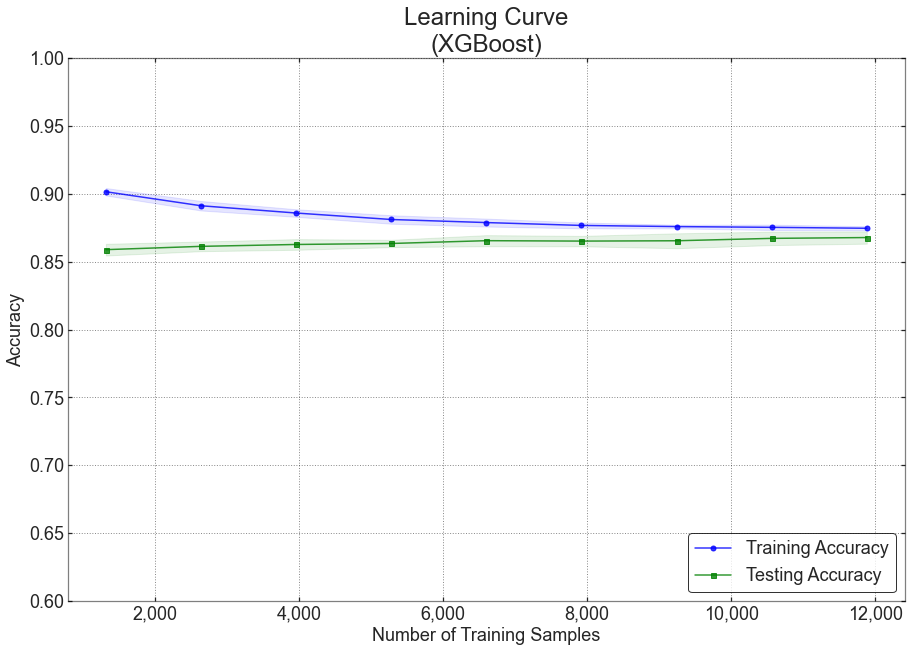

<Figure size 576x432 with 0 Axes>

In [53]:
XGBoost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3, subsample = 1, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/LearningCurve_XGBoost.jpg"
                        , X_train=trainX, y_train=trainY, classifier=XGBoost, title = "Learning Curve\n(XGBoost)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

[learning_curve] Training set sizes: [ 1320  2640  3960  5280  6601  7921  9241 10561 11881]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed: 16.6min remaining: 36.8min
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed: 29.3min remaining: 14.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 40.3min finished


<Figure size 1080x720 with 0 Axes>

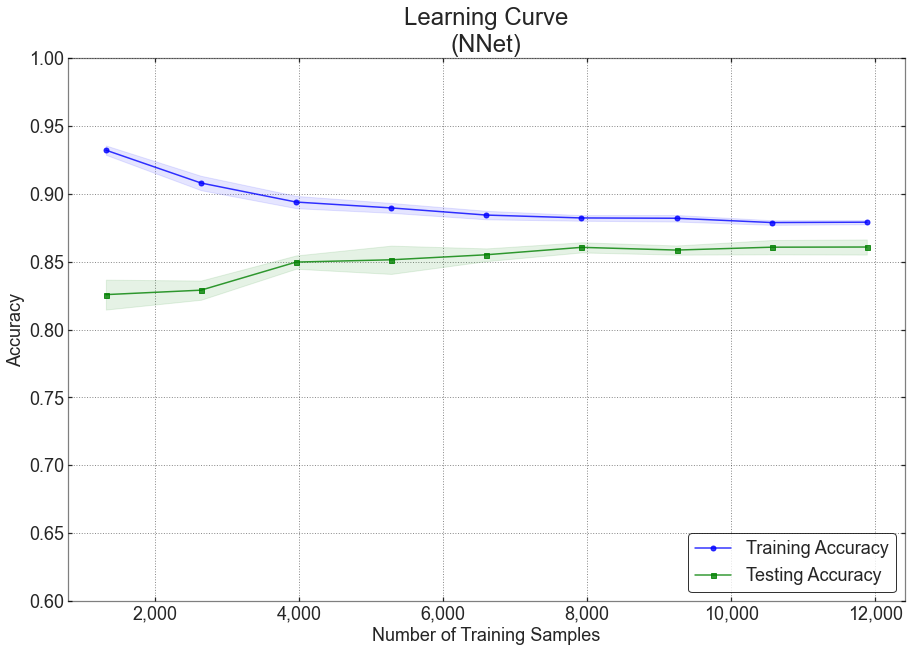

<Figure size 576x432 with 0 Axes>

In [54]:
def create_model(activation='relu', optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

NNet = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/LearningCurve_NNet.jpg"
                        , X_train=trainX, y_train=trainY, classifier=NNet, title = "Learning Curve\n(NNet)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

1. Decision Tree

2. K Nearest Neighbors



C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3. Support Vector Machine



C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


4. Boosted Tree

[01:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


5. Neural Network



<Figure size 1080x720 with 0 Axes>

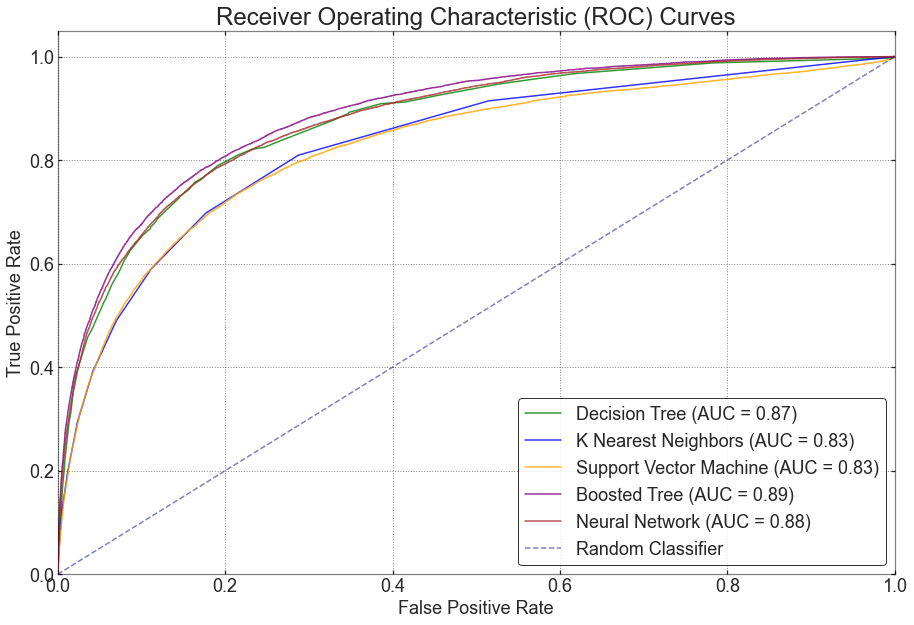

<Figure size 576x432 with 0 Axes>

In [69]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=903949505)

KNN = KNeighborsClassifier(n_neighbors=10, p=2)

SVM = SVC(kernel='rbf', C = 10, gamma = 0.02, random_state=903949505, probability=True)

XGBoost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3, subsample = 1, random_state=903949505)

def create_model(activation='relu', optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

NNet = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

models_dict = {
    'Decision Tree': DTree,
    'K Nearest Neighbors': KNN,
    'Support Vector Machine': SVM,
    'Boosted Tree': XGBoost,
    'Neural Network': NNet
}

results = evaluate_models(models_dict, trainX, trainY, testX, testY
                          , printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/Model_comparison.jpg")

In [73]:
pd.DataFrame(results).to_excel("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/Model_comparison.xlsx", index=True)